In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\SUNIL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [9]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [13]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [17]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [20]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [21]:
X_train.head()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
331,45.5,28.5000,0,45.5,45.5,28.5000,28.5000
733,23.0,13.0000,0,23.0,23.0,13.0000,13.0000
382,32.0,7.9250,0,32.0,32.0,7.9250,7.9250
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542
813,6.0,31.2750,6,6.0,6.0,31.2750,31.2750


In [27]:
print('Variance of original Age:', X_train['Age'].var())
print('Variance of Age after mean Imputation:', X_train['Age_mean'].var())
print('Variance of Age after median Imputation:', X_train['Age_median'].var())
print('\nVariance of original Fare:', X_train['Fare'].var())
print('Variance of Fare after mean Imputation:', X_train['Fare_mean'].var())
print('Variance of Fare after median Imputation:', X_train['Fare_median'].var())

Variance of original Age: 210.2517072477435
Variance of Age after mean Imputation: 168.85193366872227
Variance of Age after median Imputation: 169.20731007048155

Variance of original Fare: 2761.0314349486343
Variance of Fare after mean Imputation: 2621.232374951235
Variance of Fare after median Imputation: 2637.012481677765


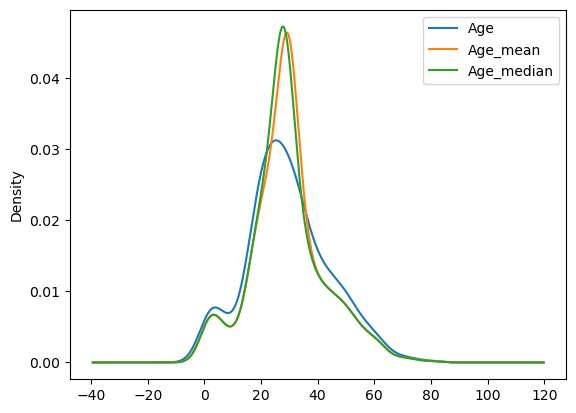

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# After mean imputation
X_train['Age_mean'].plot(kind='kde', ax=ax)

# After median imputation
X_train['Age_median'].plot(kind='kde', ax=ax)

plt.legend()
plt.show()

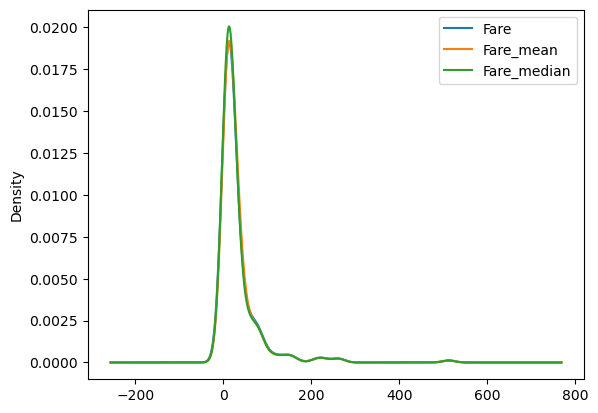

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# After mean imputation
X_train['Fare_mean'].plot(kind='kde', ax=ax)

# After median imputation
X_train['Fare_median'].plot(kind='kde', ax=ax)

plt.legend()
plt.show()

In [33]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


In [34]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088944
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204536,0.204981
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.089416,0.091145
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.084346,0.085941
Fare_median,0.087232,1.000000,0.204536,0.089416,0.084346,1.000000,0.997003
Fare_mean,0.088944,1.000000,0.204981,0.091145,0.085941,0.997003,1.000000


<Axes: >

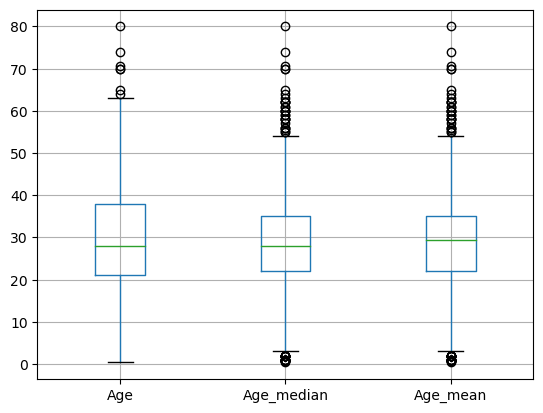

In [35]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

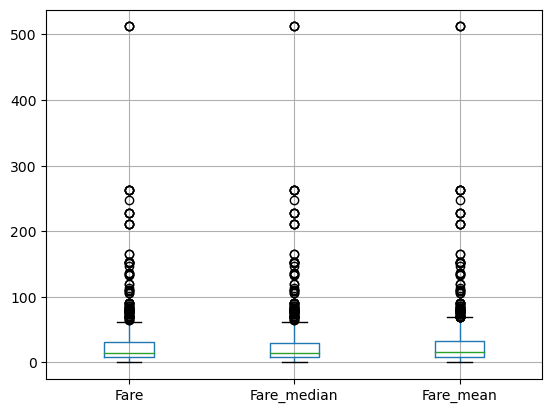

In [36]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')

In [47]:
trf = ColumnTransformer([
    ('imputer_mean', imputer_mean, ['Age']),
    ('imputer_median', imputer_median, ['Fare'])
], remainder='passthrough')

In [48]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer_mean', SimpleImputer(), ['Age']),
                                ('imputer_median',
                                 SimpleImputer(strategy='median'), ['Fare'])])

In [49]:
trf.named_transformers_['imputer_mean'].statistics_

array([29.49884615])

In [50]:
trf.named_transformers_['imputer_median'].statistics_

array([14.4])

In [51]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [54]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.4   ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])